<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 4 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Réalisez une étude de santé publique avec R ou Python
</h2>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



Note jeremy
Est ce qu'il faut faire le calcul de la sous nutrition sur les pays qu'on a ?
Est ce qu'il faut faire des graphiques ?
Rajouter le soja
La liste des céréales est difficile a trouver ...

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [70]:
#Importation de la librairie Pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers Excel</h3>
</div>

In [72]:
#Importation du fichier population.csv
path='drive/MyDrive/datas/'
population = pd.read_csv(path+'population.csv')

#Importation du fichier dispo_alimentaire.csv
dispo_alimentaire= pd.read_csv(path+'dispo_alimentaire.csv')

#Importation du fichier aide_alimentaire.csv
aide_alimentaire=pd.read_csv(path+'aide_alimentaire.csv')

#Importation du fichier sous_nutrition.csv
sous_nutrition=pd.read_csv(path+'sous_nutrition.csv')

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier population</h3>
</div>

In [73]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(population.shape[0]))
print("Le tableau comporte {} colonne(s)".format(population.shape[1]))

Le tableau comporte 1416 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [74]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1416 non-null   object 
 1   Année   1416 non-null   int64  
 2   Valeur  1416 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ KB


In [75]:
#Affichage les 5 premières lignes de la table
print(" Les 5 premières lignes de la table 'population' : \n")
population.head()


 Les 5 premières lignes de la table 'population' : 



,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [76]:
#Nous allons harmoniser les unités. Pour cela, nous avons décidé de multiplier la population par 1000

#Multiplication de la colonne valeur par 1000
population["Valeur"] *= 1000

In [77]:
#changement du nom de la colonne Valeur par Population
population = population.rename(columns={"valeur": "population"})


In [78]:
#Affichage les 5 premières lignes de la table pour voir les modifications
population.head()


,Zone,Année,Valeur
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Analyse exploratoire du fichier disponibilité alimentaire</h3>
</div>

In [79]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(dispo_alimentaire.shape[0]))
print("Le tableau comporte {} colonne(s)".format(dispo_alimentaire.shape[1]))


Le tableau comporte 15605 observation(s) ou article(s)
Le tableau comporte 18 colonne(s)


In [80]:
#Consulter le nombre de colonnes
print(f"Nombre de colonne : {dispo_alimentaire.shape[1]}")


Nombre de colonne : 18


In [81]:
#Affichage les 5 premières lignes de la table
print("Les 5 premières lignes :")
dispo_alimentaire.head()


Les 5 premières lignes :


,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [82]:
#remplacement des NaN dans le dataset par des 0
dispo_alimentaire=dispo_alimentaire.fillna(0)


In [83]:
colonnes_a_convertir = [
    "Disponibilité intérieure",
    "Exportations - Quantité",
    "Importations - Quantité",
    "Nourriture",
    "Pertes",
    "Production",
    "Semences",
    "Traitement",
    "Variation de stock",
    "Aliments pour animaux"
]

dispo_alimentaire.loc[:, colonnes_a_convertir] *= 1000000



In [84]:
#Affichage les 5 premières lignes de la table

dispo_alimentaire.head()


,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier aide alimentaire</h3>
</div>

In [85]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(aide_alimentaire.shape[0]))
print("Le tableau comporte {} colonne(s)".format(aide_alimentaire.shape[1]))


Le tableau comporte 1475 observation(s) ou article(s)
Le tableau comporte 4 colonne(s)


In [86]:
#Consulter le nombre de colonnes
print(f"Nombre de colonne : {aide_alimentaire.shape[1]}")


Nombre de colonne : 4


In [87]:
#Affichage les 5 premières lignes de la table
aide_alimentaire.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [88]:
#changement du nom de la colonne Pays bénéficiaire par Zone
aide_alimentaire.rename(columns={"Pays bénéficiaire":"Zone"},inplace=True)

In [89]:
#Multiplication de la colonne Aide_alimentaire qui contient des tonnes par 1000 pour avoir des kg
aide_alimentaire["Valeur"]= aide_alimentaire["Valeur"] * 1000

In [90]:
#Affichage les 5 premières lignes de la table
aide_alimentaire.head()

,Zone,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier sous nutrition</h3>
</div>

In [91]:
#Afficher les dimensions du dataset
print(f"Le tableau comporte {sous_nutrition.shape[0]} observation(s) ou article(s)")
print(f"Le tableau comporte {sous_nutrition.shape[1]} colonne(s)")


Le tableau comporte 1218 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [92]:
#Consulter le nombre de colonnes
print(f"Nombre de colonne {sous_nutrition.shape[1]}")


Nombre de colonne 3


In [93]:
#Afficher les 5 premières lignes de la table
sous_nutrition.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [94]:
#Conversion de la colonne (avec l'argument errors=coerce qui permet de convertir automatiquement les lignes qui ne sont pas des nombres en NaN)
sous_nutrition['Valeur'] = pd.to_numeric(sous_nutrition['Valeur'], errors='coerce')
#Puis remplacement des NaN en 0
sous_nutrition['Valeur'] = sous_nutrition['Valeur'].fillna(0)


In [95]:
#changement du nom de la colonne Valeur par sous_nutrition
sous_nutrition.rename(columns={'Valeur': 'sous_nutrition'}, inplace=True)
print(sous_nutrition)

             Zone      Année  sous_nutrition
0     Afghanistan  2012-2014             8.6
1     Afghanistan  2013-2015             8.8
2     Afghanistan  2014-2016             8.9
3     Afghanistan  2015-2017             9.7
4     Afghanistan  2016-2018            10.5
...           ...        ...             ...
1213     Zimbabwe  2013-2015             0.0
1214     Zimbabwe  2014-2016             0.0
1215     Zimbabwe  2015-2017             0.0
1216     Zimbabwe  2016-2018             0.0
1217     Zimbabwe  2017-2019             0.0

[1218 rows x 3 columns]


In [96]:
#Multiplication de la colonne sous_nutrition par 1000000
sous_nutrition['sous_nutrition']=sous_nutrition["sous_nutrition"] * 1000000


In [97]:
#Afficher les 5 premières lignes de la table
sous_nutrition.head()

,Zone,Année,sous_nutrition
0,Afghanistan,2012-2014,8600000.0
1,Afghanistan,2013-2015,8800000.0
2,Afghanistan,2014-2016,8900000.0
3,Afghanistan,2015-2017,9700000.0
4,Afghanistan,2016-2018,10500000.0


## Etape 3 - Analyses


<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1 - Proportion de personnes en sous nutrition</h3>
</div>

In [98]:
# Il faut tout d'abord faire une jointure entre la table population et la table sous nutrition, en ciblant l'année 2017

population['Année'] = population['Année'].astype(str)
sous_nutrition['Année'] = sous_nutrition['Année'].astype(str)

# Filtrer les données pour l'année 2017 dans la colonne 'Année' de sous_nutrition
sous_nutrition_2017 = sous_nutrition[sous_nutrition["Année"]=='2016-2018']

# Filtrer les données pour l'année 2017 dans la population
population_2017 = population[population["Année"] == '2017']

# Jointure sur la colonne 'Zone'
pop_sous_nutrition_2017 = pd.merge(population_2017, sous_nutrition_2017, left_on=["Zone"], right_on=["Zone"])



In [99]:
#Affichage du dataset
pop_sous_nutrition_2017.head()

,Zone,Année_x,Valeur,Année_y,sous_nutrition
0,Afghanistan,2017,36296113.0,2016-2018,10500000.0
1,Afrique du Sud,2017,57009756.0,2016-2018,3100000.0
2,Albanie,2017,2884169.0,2016-2018,100000.0
3,Algérie,2017,41389189.0,2016-2018,1300000.0
4,Allemagne,2017,82658409.0,2016-2018,0.0


In [100]:
#Calcul et affichage du nombre de personnes en état de sous nutrition
pop_sous_nutrition_somme=pop_sous_nutrition_2017["sous_nutrition"].sum()
print(f"En 2017, le nombre de personne en état de sous nutition est de: {round(pop_sous_nutrition_somme):,}.")

En 2017, le nombre de personne en état de sous nutition est de: 535,700,000.


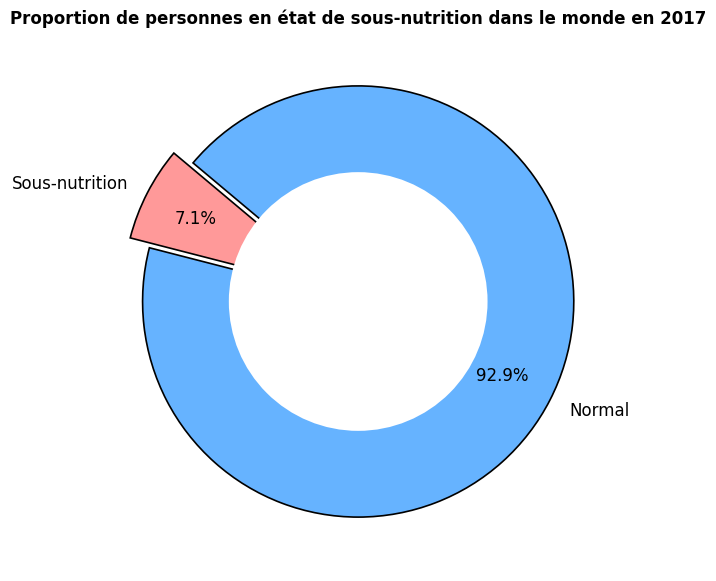

In [101]:
# Calcul des proportions
population_mondiale_2017 = pop_sous_nutrition_2017['Valeur'].sum()
proportion_personne_sous_nutrition = (pop_sous_nutrition_somme / population_mondiale_2017) * 100
proportion_normale = 100 - proportion_personne_sous_nutrition



# Graphique
labels = ["Sous-nutrition", "Normal"]
sizes = [pop_sous_nutrition_somme, population_mondiale_2017 - pop_sous_nutrition_somme]
colors = ["#ff9999", "#66b3ff"]
explode = (0.1, 0)
plt.figure(figsize=(7, 7))
wedges, texts, autotexts = plt.pie(
    sizes, labels=labels, autopct='%1.1f%%', colors=colors, explode=explode,
    startangle=140, wedgeprops={"edgecolor": "black", "linewidth": 1.2},
    textprops={"fontsize": 12}, pctdistance=0.75
)

centre_circle = plt.Circle((0, 0), 0.60, fc='white')
plt.gca().add_artist(centre_circle)
plt.title("Proportion de personnes en état de sous-nutrition dans le monde en 2017", fontsize=12, fontweight="bold")
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2 - Nombre théorique de personne qui pourrait être nourries</h3>
</div>

In [102]:
#Combien mange en moyenne un être humain ? Source => https://agriculture.gouv.fr/infographie-la-consommation-alimentaire & https://www.msdmanuals.com/fr/accueil/multimedia/table/nombre-de-calories-n%C3%A9cessaires-estim%C3%A9-dapr%C3%A8s-l%C3%A2ge-le-sexe-et-le-niveau-dactivit%C3%A9-physique

print("Une femme a besoin en moyenne de 2000 kcal par jour, tandis qu'un homme a besoin de 2600 kcal par jour.\n"
      "En supposant que la population mondiale est composée d'hommes et de femmes répartis de manière égale :\n"
      "On a besoin de 2300 kcal par jour et par humain en moyenne.")
conso_nourriture_kcl_jour = 2300
conso_nourriture_kcl_an = 2300 * 365

Une femme a besoin en moyenne de 2000 kcal par jour, tandis qu'un homme a besoin de 2600 kcal par jour.
En supposant que la population mondiale est composée d'hommes et de femmes répartis de manière égale :
On a besoin de 2300 kcal par jour et par humain en moyenne.


In [103]:
#On commence par faire une jointure entre le data frame population et Dispo_alimentaire afin d'ajouter dans ce dernier la population

pop_dispo_alimentaire_2017 =   dispo_alimentaire.merge(population.loc[population['Année'] == '2017'],on='Zone')

In [104]:
#Affichage du nouveau dataframe
pop_dispo_alimentaire_2017.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Valeur
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0,2017,36296113.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,2017,36296113.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0


In [105]:
#Création de la colonne dispo_kcal avec calcul des kcal disponibles mondialement

pop_dispo_alimentaire_2017["dispo_kcal"]= pop_dispo_alimentaire_2017['Disponibilité alimentaire (Kcal/personne/jour)'] * pop_dispo_alimentaire_2017['Valeur'] * 365

print(f'La disponibilité mondial en kcal est de {round(pop_dispo_alimentaire_2017["dispo_kcal"].sum()):,}')


La disponibilité mondial en kcal est de 7,635,429,388,975,815


In [106]:
#Calcul du nombre d'humains pouvant être nourris
nb_humains_nourris= pop_dispo_alimentaire_2017['dispo_kcal'].sum() / conso_nourriture_kcl_an
print(f"En théorie, la production calorique disponible pourrait nourrir environ {round(nb_humains_nourris):,} personnes, soit {round(((nb_humains_nourris/population_mondiale_2017)*100),2)}% de la population mondiale.\n Ainsi, l’ensemble de la population mondiale pourrait être correctement alimenté, compte tenu d’un surplus calorique estimé à 20%.")

En théorie, la production calorique disponible pourrait nourrir environ 9,095,210,708 personnes, soit 120.57% de la population mondiale.
 Ainsi, l’ensemble de la population mondiale pourrait être correctement alimenté, compte tenu d’un surplus calorique estimé à 20%.


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3 - Nombre théorique de personne qui pourrait être nourrie avec les produits végétaux</h3>
</div>

In [107]:
#Transfert des données avec les végétaux dans un nouveau dataframe
pop_dispo_alimentaire_2017_vegetal=pop_dispo_alimentaire_2017[pop_dispo_alimentaire_2017['Origine']=='vegetale']
pop_dispo_alimentaire_2017_vegetal.head(20)


,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Valeur,dispo_kcal
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,4.100000e+07,...,4.000000e+07,3.900000e+07,2000000.0,3.000000e+06,0.0,0.0,0.0,2017,36296113.0,1.324808e+10
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.000000e+06,...,2.000000e+06,2.000000e+06,0.0,0.000000e+00,0.0,0.0,0.0,2017,36296113.0,1.324808e+10
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,2017,36296113.0,0.000000e+00
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,8.200000e+07,...,8.200000e+07,8.200000e+07,0.0,0.000000e+00,0.0,0.0,0.0,2017,36296113.0,5.299232e+10
6,Afghanistan,Bière,vegetale,0.0,0.0,0.0,0.09,0.00,0.00,3.000000e+06,...,3.000000e+06,3.000000e+06,0.0,0.000000e+00,0.0,0.0,0.0,2017,36296113.0,0.000000e+00
7,Afghanistan,Blé,vegetale,0.0,0.0,1369.0,160.23,4.69,36.91,5.992000e+09,...,1.173000e+09,4.895000e+09,775000000.0,5.169000e+09,322000000.0,0.0,-350000000.0,2017,36296113.0,1.813662e+13
8,Afghanistan,Boissons Alcooliques,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,2017,36296113.0,0.000000e+00
9,Afghanistan,Café,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,2017,36296113.0,0.000000e+00
10,Afghanistan,Coco (Incl Coprah),vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,2017,36296113.0,0.000000e+00
12,Afghanistan,"Céréales, Autres",vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,2017,36296113.0,0.000000e+00


In [108]:
#Calcul du nombre de kcal disponible pour les végétaux

kcal_dispo_vegetales=pop_dispo_alimentaire_2017_vegetal["dispo_kcal"].sum()
print(f"Les végétaux produits comptent  {round(kcal_dispo_vegetales):,} kcal disponibles.")


Les végétaux produits comptent  6,300,178,937,197,865 kcal disponibles.


In [109]:
#Calcul du nombre d'humains pouvant être nourris avec les végétaux

humains_nourris_vegetaux=kcal_dispo_vegetales/conso_nourriture_kcl_an

print(f"Les calories issues des végétaux permettraient de nourrir {round(humains_nourris_vegetaux):,} personnes, soit {(round(humains_nourris_vegetaux/population_mondiale_2017,3)*100)} % de la population mondiale en 2017.\n Ainsi, presque l’ensemble de l’humanité de cette année-là pourrait être alimenté exclusivement par les ressources végétales.")

Les calories issues des végétaux permettraient de nourrir 7,504,680,092 personnes, soit 99.5 % de la population mondiale en 2017.
 Ainsi, presque l’ensemble de l’humanité de cette année-là pourrait être alimenté exclusivement par les ressources végétales.


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.4 - Utilisation de la disponibilité intérieure</h3>
</div>

In [110]:
#Calcul de la disponibilité totale : Disponibilite totale
Disponibilite_interieure_totale=pop_dispo_alimentaire_2017['Disponibilité intérieure'].sum()
print(f"La disponibilité intérieure totale est de {round(Disponibilite_interieure_totale):,} kcal")



La disponibilité intérieure totale est de 9,733,927,000,000 kcal


In [134]:
#création d'une boucle for pour afficher les différentes valeurs en fonction des colonnes aliments pour animaux, pertes, nourritures,
# Donner la part de l'alimentation humaine, animale , perdue(est ce qu'on peut calculer les autres?)

# Liste des catégories à afficher
liste_col = ["Aliments pour animaux", "Pertes", "Nourriture","Semences","Traitement","Autres Utilisations"]
proportions = []
labels = []

for col in liste_col :
  proportion=(dispo_alimentaire[col].sum() / Disponibilite_interieure_totale ) * 100
  print(f'Les {col} représente {round(proportion,2)}% dans la disponibilité intérieur de nourriture')

Les Aliments pour animaux représente 13.4% dans la disponibilité intérieur de nourriture
Les Pertes représente 4.66% dans la disponibilité intérieur de nourriture
Les Nourriture représente 50.1% dans la disponibilité intérieur de nourriture
Les Semences représente 1.59% dans la disponibilité intérieur de nourriture
Les Traitement représente 22.65% dans la disponibilité intérieur de nourriture
Les Autres Utilisations représente 0.0% dans la disponibilité intérieur de nourriture


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.5 - Utilisation des céréales</h3>
</div>

In [112]:
liste_cereales=['Blé','Riz (Eq Blanchi)','Orge','Maïs','Seigle','Avoine','Millet','Sorgho','Céréales, Autres']#Création d'une liste avec toutes les variables


In [113]:
#Création d'un dataframe avec les informations uniquement pour ces céréales
pop_dispo_alimentaire_2017_cereales= pop_dispo_alimentaire_2017[pop_dispo_alimentaire_2017['Produit'].isin(liste_cereales)]
pop_dispo_alimentaire_2017_cereales.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Valeur,dispo_kcal
7,Afghanistan,Blé,vegetale,0.0,0.0,1369.0,160.23,4.69,36.91,5.992000e+09,...,1.173000e+09,4.895000e+09,775000000.0,5.169000e+09,322000000.0,0.0,-350000000.0,2017,36296113.0,1.813662e+13
12,Afghanistan,"Céréales, Autres",vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,2017,36296113.0,0.000000e+00
32,Afghanistan,Maïs,vegetale,200000000.0,0.0,21.0,2.50,0.30,0.56,3.130000e+08,...,1.000000e+06,7.600000e+07,31000000.0,3.120000e+08,5000000.0,0.0,0.0,2017,36296113.0,2.782097e+11
34,Afghanistan,Millet,vegetale,0.0,0.0,3.0,0.40,0.02,0.08,1.300000e+07,...,0.000000e+00,1.200000e+07,1000000.0,1.300000e+07,0.0,0.0,0.0,2017,36296113.0,3.974424e+10
40,Afghanistan,Orge,vegetale,360000000.0,0.0,26.0,2.92,0.24,0.79,5.240000e+08,...,1.000000e+07,8.900000e+07,52000000.0,5.140000e+08,22000000.0,0.0,0.0,2017,36296113.0,3.444501e+11


In [114]:
#Affichage de la proportion d'alimentation animale
proportion_part_alimentation_animale= ( pop_dispo_alimentaire_2017_cereales["Aliments pour animaux"].sum() / pop_dispo_alimentaire_2017_cereales["Disponibilité intérieure"].sum() ) *100
print(f"La part des céréales utilisées pour l'alimentation des animaux est de {round(proportion_part_alimentation_animale,2)}%.")



La part des céréales utilisées pour l'alimentation des animaux est de 36.14%.


In [115]:
proportion_part_alimentation_humaine= ( pop_dispo_alimentaire_2017_cereales["Nourriture"].sum() / pop_dispo_alimentaire_2017_cereales["Disponibilité intérieure"].sum()) * 100
print(f"La part des céréales utilisées pour l'alimentation humaine est de {round(proportion_part_alimentation_humaine,2)}%.")

La part des céréales utilisées pour l'alimentation humaine est de 42.91%.


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.6 - Pays avec la proportion de personnes sous-alimentée la plus forte en 2017</h3>
</div>

In [116]:
#Création de la colonne proportion par pays
pop_sous_nutrition_2017["proportion_par_pays"]= pop_sous_nutrition_2017["sous_nutrition"] / pop_sous_nutrition_2017["Valeur"]


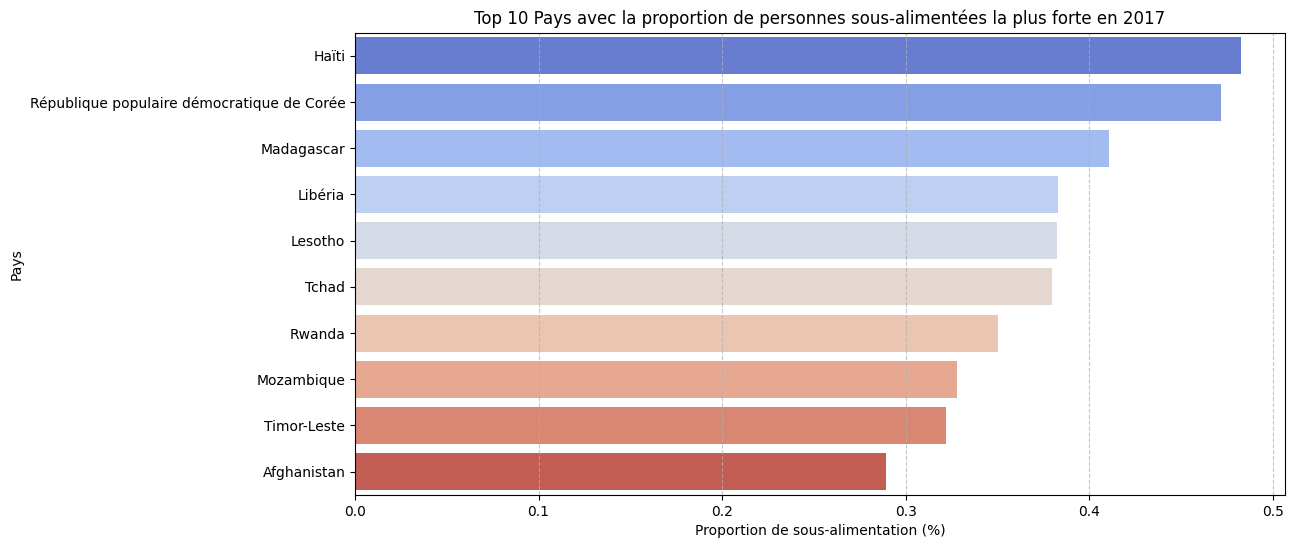

In [117]:
# Tri des pays ayant la plus forte proportion de sous-alimentation en 2017
pop_sous_nutrition_top10 = pop_sous_nutrition_2017.sort_values(by="proportion_par_pays", ascending=False).head(10)

# Graphique
plt.figure(figsize=(12, 6))
sns.barplot(
    data=pop_sous_nutrition_top10,
    x="proportion_par_pays",
    y="Zone",
    hue="Zone",
    palette="coolwarm"
)

plt.xlabel("Proportion de sous-alimentation (%)")
plt.ylabel("Pays")
plt.title("Top 10 Pays avec la proportion de personnes sous-alimentées la plus forte en 2017")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()



In [118]:
pop_sous_nutrition_top10[["Zone","sous_nutrition","proportion_par_pays"]]

,Zone,sous_nutrition,proportion_par_pays
78,Haïti,5300000.0,0.482592
157,République populaire démocratique de Corée,12000000.0,0.471887
108,Madagascar,10500000.0,0.410629
103,Libéria,1800000.0,0.382797
100,Lesotho,800000.0,0.382494
183,Tchad,5700000.0,0.379576
161,Rwanda,4200000.0,0.350556
121,Mozambique,9400000.0,0.328109
186,Timor-Leste,400000.0,0.321735
0,Afghanistan,10500000.0,0.289287


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.7 - Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013</h3>
</div>

In [119]:
#calcul du total de l'aide alimentaire par pays

aide_alimentaire_par_pays=aide_alimentaire.groupby('Zone',as_index=False).sum()
aide_alimentaire_top10 = aide_alimentaire_par_pays.sort_values('Valeur', ascending=False).head(10)
aide_alimentaire_top10[["Zone","Valeur"]]


,Zone,Valeur
50,République arabe syrienne,1858943000
75,Éthiopie,1381294000
70,Yémen,1206484000
61,Soudan du Sud,695248000
60,Soudan,669784000
30,Kenya,552836000
3,Bangladesh,348188000
59,Somalie,292678000
53,République démocratique du Congo,288502000
43,Niger,276344000


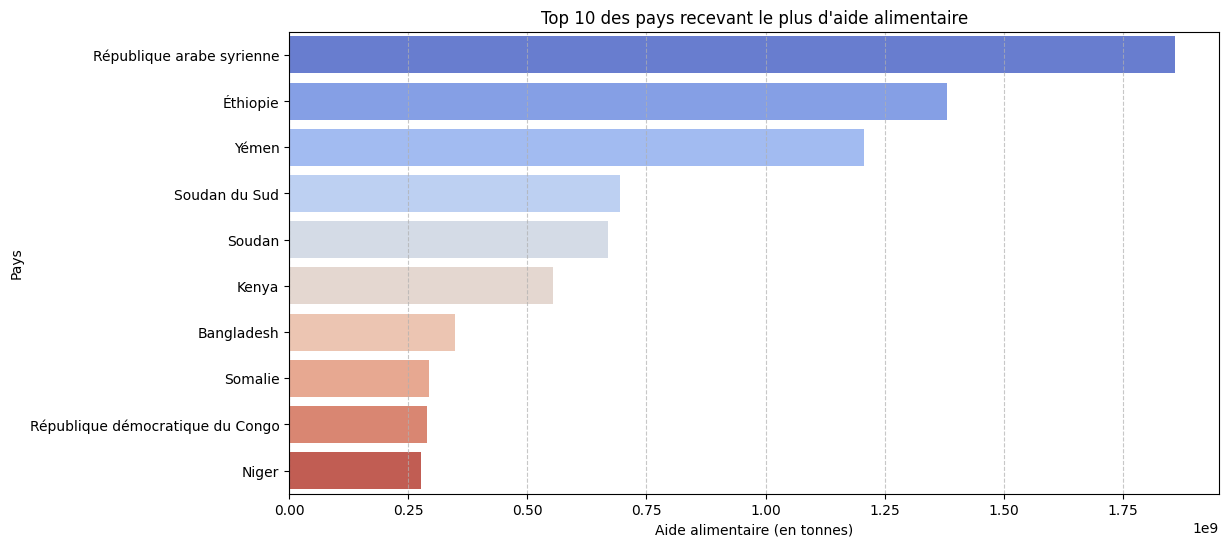

In [120]:


#Graphique
plt.figure(figsize=(12, 6))
sns.barplot(
    data=aide_alimentaire_top10,
    x="Valeur",
    y="Zone",
    hue="Zone",
    dodge=False,
    palette="coolwarm",
    legend=False
)

plt.xlabel("Aide alimentaire (en tonnes)")
plt.ylabel("Pays")
plt.title("Top 10 des pays recevant le plus d'aide alimentaire")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.8 - Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016</h3>
</div>

In [121]:
#Création d'un dataframe avec la zone, l'année et l'aide alimentaire puis groupby sur zone et année
aide_alimentaire_par_pays_2=aide_alimentaire[['Zone','Année','Valeur']].groupby(['Zone','Année'],as_index=False)['Valeur'].sum()
aide_alimentaire_par_pays_2.head(20)


,Zone,Année,Valeur
0,Afghanistan,2013,128238000
1,Afghanistan,2014,57214000
2,Algérie,2013,35234000
3,Algérie,2014,18980000
4,Algérie,2015,17424000
5,Algérie,2016,9476000
6,Angola,2013,5000000
7,Angola,2014,14000
8,Bangladesh,2013,131018000
9,Bangladesh,2014,194628000


In [122]:
#Création d'une liste contenant les 5 pays qui ont le plus bénéficiées de l'aide alimentaire
pays_top_cinq_aide_alimentaire_liste=aide_alimentaire_par_pays.sort_values('Valeur', ascending=False)[['Zone', 'Valeur']]["Zone"].head().tolist()
pays_top_cinq_aide_alimentaire_liste

['République arabe syrienne', 'Éthiopie', 'Yémen', 'Soudan du Sud', 'Soudan']

In [123]:
#On filtre sur le dataframe avec notre liste
pays_top_cinq_aide_alimentaire=aide_alimentaire_par_pays_2[aide_alimentaire_par_pays_2['Zone'].isin(pays_top_cinq_aide_alimentaire_liste)]



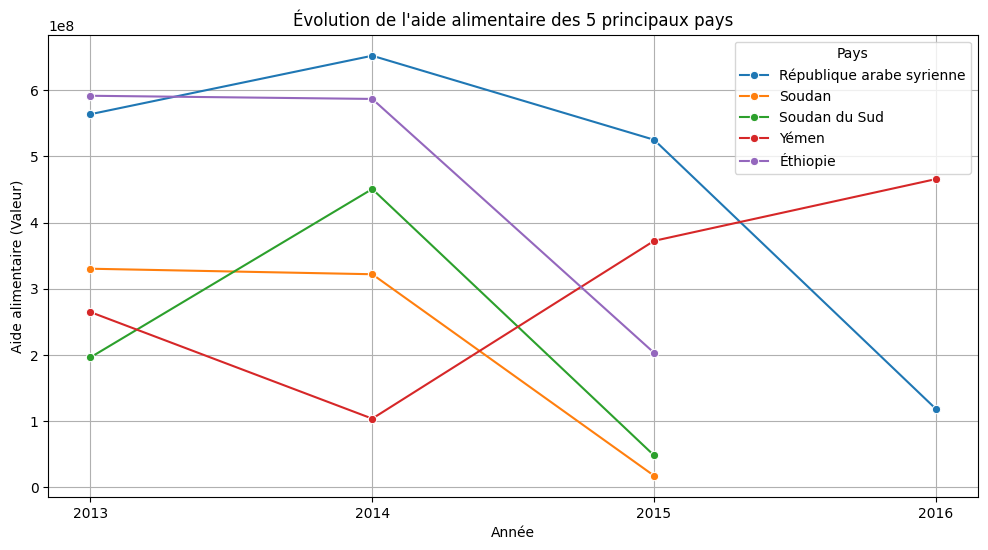

In [124]:
# Affichage des pays avec l'aide alimentaire par année
pays_top_cinq_aide_alimentaire

plt.figure(figsize=(12, 6))

sns.lineplot(data=pays_top_cinq_aide_alimentaire, x='Année', y='Valeur', hue='Zone', marker='o')

annees_uniques = sorted(pays_top_cinq_aide_alimentaire['Année'].unique())
plt.xticks(ticks=annees_uniques)

plt.title("Évolution de l'aide alimentaire des 5 principaux pays")
plt.xlabel("Année")
plt.ylabel("Aide alimentaire (Valeur)")
plt.legend(title="Pays")
plt.grid(True)

plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.9 - Pays avec le moins de disponibilité par habitant</h3>
</div>

In [125]:
#Affichage des 10 pays qui ont le moins de dispo alimentaire par personne
dispo_alimentaire.groupby("Zone")['Disponibilité alimentaire (Kcal/personne/jour)'].sum().sort_values(ascending=True).head(10)

,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
République centrafricaine,1879.0
Zambie,1924.0
Madagascar,2056.0
Afghanistan,2087.0
Haïti,2089.0
République populaire démocratique de Corée,2093.0
Tchad,2109.0
Zimbabwe,2113.0
Ouganda,2126.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.10 - Pays avec le plus de disponibilité par habitant</h3>
</div>

<ipython-input-126-c45867796028>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


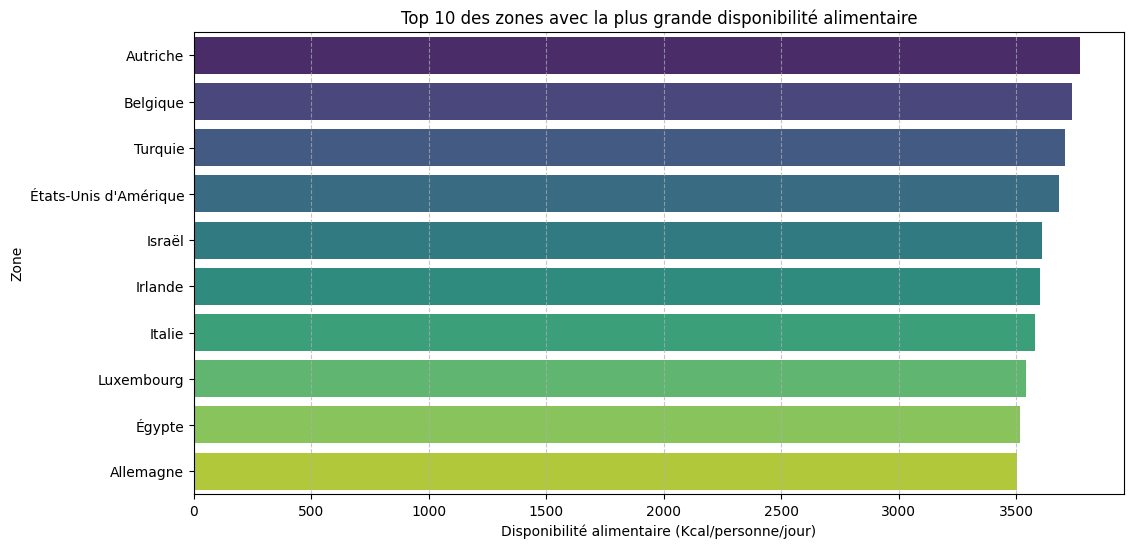

In [126]:
#Affichage des 10 pays qui ont le plus de dispo alimentaire par personne

dispo_alimentaire_top10 = dispo_alimentaire.groupby("Zone")['Disponibilité alimentaire (Kcal/personne/jour)']\
    .sum().sort_values(ascending=False).head(10)

zones = dispo_alimentaire_top10.index
valeurs = dispo_alimentaire_top10.values

plt.figure(figsize=(12, 6))
sns.barplot(
    x=valeurs,
    y=zones,
    palette="viridis"
)

plt.xlabel("Disponibilité alimentaire (Kcal/personne/jour)")
plt.ylabel("Zone")
plt.title("Top 10 des zones avec la plus grande disponibilité alimentaire")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


### 3.101 -Pays avec le moins de disponibilité par **habitant**

<ipython-input-127-e03bec51ab26>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


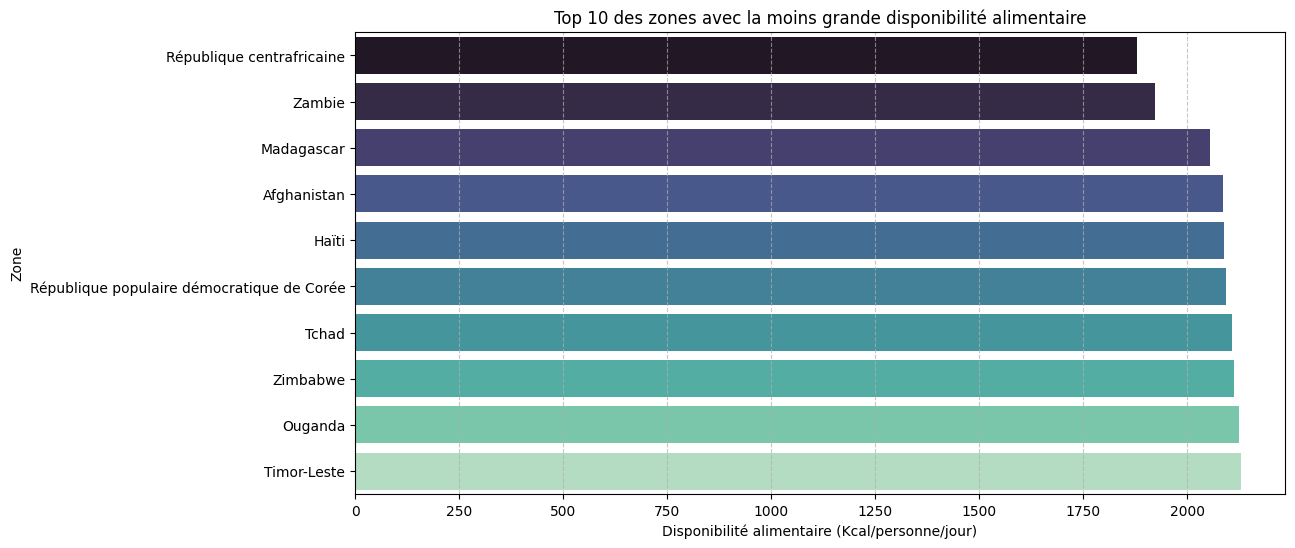

In [127]:
dispo_alimentaire_top10less = dispo_alimentaire.groupby("Zone")['Disponibilité alimentaire (Kcal/personne/jour)'].sum().sort_values(ascending=True).head(10)

zones=dispo_alimentaire_top10less.index
valeurs = dispo_alimentaire_top10less.values


plt.figure(figsize=(12, 6))
sns.barplot(
    x=valeurs,
    y=zones,
    palette="mako"
)

plt.xlabel("Disponibilité alimentaire (Kcal/personne/jour)")
plt.ylabel("Zone")
plt.title("Top 10 des zones avec la moins grande disponibilité alimentaire")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.11 - Exemple de la Thaïlande pour le Manioc</h3>
</div>

In [128]:
#création d'un dataframe avec uniquement la Thaïlande
pop_sous_nutrition_Thai=pop_sous_nutrition_2017 [(pop_sous_nutrition_2017["Zone"] == "Thaïlande")]
pop_sous_nutrition_Thai.head()



,Zone,Année_x,Valeur,Année_y,sous_nutrition,proportion_par_pays
185,Thaïlande,2017,69209810.0,2016-2018,6200000.0,0.089583


In [129]:
#Calcul de la sous nutrition en Thaïlande



sous_nutrition_2017_Thai = pop_sous_nutrition_Thai["sous_nutrition"].iloc[0]
population_2017_Thai=pop_sous_nutrition_Thai["Valeur"].iloc[0]
print(f"Sur une population de {round(population_2017_Thai):,} habitants, nous trouvons {round(sous_nutrition_2017_Thai):,} d'individu en état de sous nutrition.")
print(f"Ainsi {round( (sous_nutrition_2017_Thai / population_2017_Thai) * 100 ,2)}% de la population Thailandaise est touchée.")

Sur une population de 69,209,810 habitants, nous trouvons 6,200,000 d'individu en état de sous nutrition.
Ainsi 8.96% de la population Thailandaise est touchée.


In [130]:


dispo_alimentaire_Manioc=dispo_alimentaire[dispo_alimentaire["Produit"]=="Manioc"]

dispo_alimentaire_Thai=dispo_alimentaire[dispo_alimentaire["Zone"]=="Thaïlande"]
dispo_alimentaire_thai_par_habitant= dispo_alimentaire_Thai["Disponibilité intérieure"] / population_2017_Thai

dispo_alimentaire_thai_par_habitant.head()


,Disponibilité intérieure
13759,1.069213
13760,0.115591
13761,5.172677
13762,0.173386
13763,11.298976


In [131]:
dispo_alimentaire_Thai_Manioc=dispo_alimentaire_Thai[dispo_alimentaire_Thai["Produit"]=="Manioc"]
ratio_exportation_manioc = (dispo_alimentaire_Thai_Manioc["Exportations - Quantité"] / dispo_alimentaire_Thai_Manioc["Production"]) * 100


ratio_exportation_manioc = ratio_exportation_manioc.values[0]

print(f"La Thaïlande exporte {ratio_exportation_manioc:.2f} % de sa production de manioc,ce qui témoigne de son orientation vers le marché international.\nCela suggère que la culture du manioc dans le pays est principalement destinée à l’exportation plutôt qu'à la consommation locale.")

La Thaïlande exporte 83.41 % de sa production de manioc,ce qui témoigne de son orientation vers le marché international.
Cela suggère que la culture du manioc dans le pays est principalement destinée à l’exportation plutôt qu'à la consommation locale.


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 6 - Analyse complémentaires</h2>
</div>

### 6.1 - Population pouvant être nourris avec les pertes

In [132]:
Pertes_2017=pop_dispo_alimentaire_2017['Pertes'].sum()
population_nourries_pertes=round(Pertes_2017/conso_nourriture_kcl_an,2)
print(f"Les pertes pourraient nourrir {round(population_nourries_pertes):,} personnes.")
print(f"Cela représente {round((population_nourries_pertes/population_mondiale_2017)*100,2)}% de la population mondiale")

Les pertes pourraient nourrir 538,753 personnes.
Cela représente 0.01% de la population mondiale
